In [1]:
import numpy as np
import pandas as pd
#import dask.bag as db
import dask.dataframe as dd
from plotnine import *
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# read countries file
with open("countries.txt", mode="r", encoding="utf-8") as f:
    content_read = f.readlines()
content=[]
for x in content_read:
    x=x.strip()
    x=x.replace(u'\ufeff', '')
    content.append(x)
# create table with the countries
countries=[]
for line in content:
    words=line.split('|')
    country=[]
    for word in words:
        country.append(word)
    countries.append(country)
# read cities file
with open("world-cities.txt", mode="r", encoding="utf-8") as f:
    content_read = f.readlines()
# create a cities dictionary
cities={}
for x in content_read:
    x=x.replace(u'\ufeff', '')
    words=x.split(',')
    cities[words[0].lower()]=words[1]    

In [3]:
def find_which_country(countries, cities, location):
    # US states
    states=[' AL',' AK',' AZ',' AR',' CA',' CO',' CT',' DE',' FL',' GA',' HI', \
        ' ID',' IL',' IN',' IA',' KS',' KY',' LA',' ME',' MD',' MA',' MI', \
        ' MN',' MS',' MO',' MT',' NE',' NV',' NH',' NJ',' NM',' NY',' NC', \
        ' ND',' OH',' OK',' OR',' PA',' RI',' SC',' SD',' TN',' TX',' UT', \
        ' VT',' VA',' WA',' WV',' WI',' WY',' DC']
    if isinstance(location, str):
        loc=location.lower()
        # check if country can be found in location
        for index, country in enumerate(countries):
            for word in country:
                if word.lower() in loc:
                    return countries[index][0]
        #check if first word in location is a known city
        words=location.split(',')
        city=words[0].lower()
        cntry=cities.get(city, 'N/A')
        if cntry != 'N/A':
            return cntry
        # check for US states
        for state in states:
            if state in location:
                return 'United States'
    return 'Others'

In [4]:
df = dd.read_csv('Users.csv',usecols=[2,3,4,5]).dropna()
df = df.astype({'CreationDate': 'datetime64', 'LastAccessDate': 'datetime64'})

In [5]:
df['Country']=df.apply(lambda row: find_which_country(countries, cities, row['Location']), axis=1)
df_others_excluded=df[df.Country != 'Others']
df_group=df_others_excluded.groupby(df_others_excluded['Country']).count().compute()

df_group.info()

/home/tamiris/anaconda3/lib/python3.6/site-packages/dask/dataframe/core.py:3018: UserWarning: `meta` is not specified, inferred from partial data. Please provide `meta` if the result is unexpected.
  Before: .apply(func)
  After:  .apply(func, meta={'x': 'f8', 'y': 'f8'}) for dataframe result
  or:     .apply(func, meta=('x', 'f8'))            for series result
  warnings.warn(msg)


<class 'pandas.core.frame.DataFrame'>
Index: 242 entries, Afghanistan to Bouvet Island
Data columns (total 4 columns):
CreationDate      242 non-null int64
LastAccessDate    242 non-null int64
Location          242 non-null int64
Reputation        242 non-null int64
dtypes: int64(4)
memory usage: 9.5+ KB


In [6]:
pd.set_option('display.max_rows', 500)
df_group = df_group.drop(['CreationDate', 'LastAccessDate','Reputation'], axis=1)
df_group

,Location
Country,
Afghanistan,859
Aland Islands,11
Albania,1255
Algeria,4537
American Samoa,7
Andorra,55
Angola,224
Anguilla,6
Antarctica,221


,Location
Country,
United States,467518
India,411234
United Kingdom,134684
Germany,79011
China,75764
Canada,63407
Brazil,55597
France,50938
Russia,42094


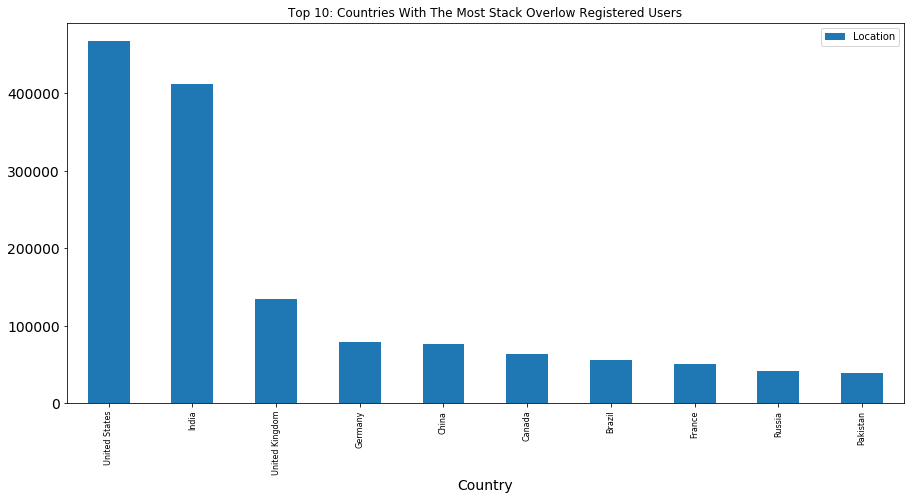

In [18]:
plt.rcParams["axes.labelsize"] = 14
plt.rcParams["xtick.labelsize"] =8
plt.rcParams["ytick.labelsize"] = 14
plt.rcParams["figure.figsize"] = [15, 7]
plt.rcParams['figure.titlesize'] = 18
d1 = df_group.sort_values('Location', ascending=False).nlargest(10, 'Location')
d1.plot.bar(title = 'Top 10: Countries With The Most Stack Overlow Registered Users')
d1

In [8]:
df_HUC = df[df['Country'].str.contains("United States|India|United Kingdom|Germany|China|Canada|Brazil|France|Russia|Pakistan")]
df_HUC = df_HUC.compute()


,Country,Reputation
0,Brazil,143.388744
1,Canada,460.120633
2,China,66.336321
3,France,405.086085
4,Germany,599.092759
5,India,142.475034
6,Pakistan,117.425434
7,Russia,277.370457
8,United Kingdom,632.431053
9,United States,512.611166


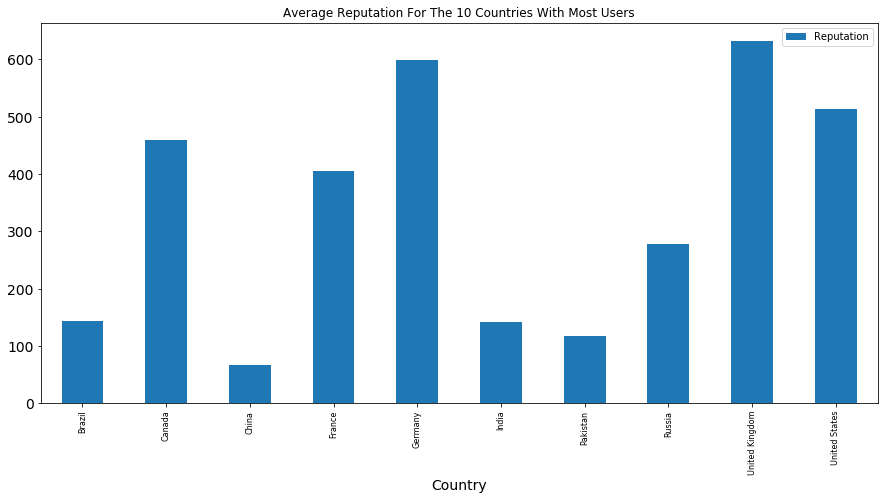

In [19]:
#average reputation for the 10 countries with most users
plt.rcParams["figure.figsize"] = [15, 7]
df_HUCRepMean = df_HUC.groupby('Country')['Reputation'].mean().reset_index()
df_HUCRepMean.plot.bar(x='Country', title= 'Average Reputation For The 10 Countries With Most Users')
df_HUCRepMean

In [10]:
#number of new accounts created per year per country

new = df_HUC['CreationDate'].groupby([df_HUC.CreationDate.dt.year.rename('year'), df_HUC.Country.rename('New Accounts')]).agg('count').reset_index()
new = new.pivot('year', 'New Accounts')

new

CreationDate                                                \
New Accounts       Brazil Canada  China France Germany   India Pakistan   
year                                                                      
2008                  149    883     22    203     525     349       14   
2009                  491   2001    330    637    1537    1876      127   
2010                  946   2596   1023   1272    2699    4957      345   
2011                 1803   3677   2411   2280    4337   11082      945   
2012                 3580   4924   4484   3620    6588   22867     1872   
2013                 5610   6008   5791   4994    8180   34733     2855   
2014                 5794   5982   4668   5382    8180   39821     3751   
2015                 4195   4279   5330   4252    6365   30909     2816   
2016                 6266   6080   8249   5610    8747   46513     4318   
2017                13602  14348  22306  11949   17096  120916    11555   
2018                13161  12629  21150  10739   14757   97211    10374   

                                                  
New Accounts Russia United Kingdom United States  
year                                              
2008             86           1884          7189  
2009            571           4176         14977  
2010           1157           5798         18612  
2011           2078           8675         26457  
2012           3340          11723         34803  
2013           4531          14153         42586  
2014           3656          13268         42533  
2015           2987           9610         31078  
2016           4669          13613         44596  
2017           9941          29930        111609  
2018           9078          21854         93078

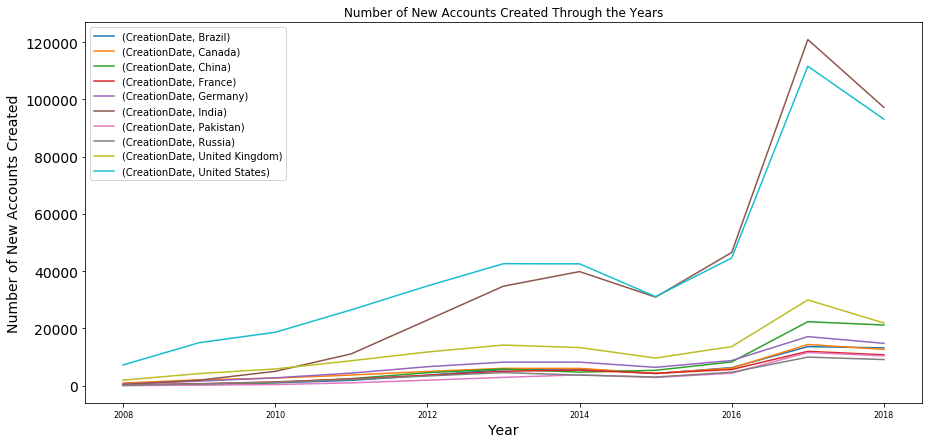

In [11]:
#line plot
new.plot.line().set(xlabel = 'Year', ylabel = 'Number of New Accounts Created', title='Number of New Accounts Created Through the Years')
plt.legend(title=False, fontsize='10')
plt.show()

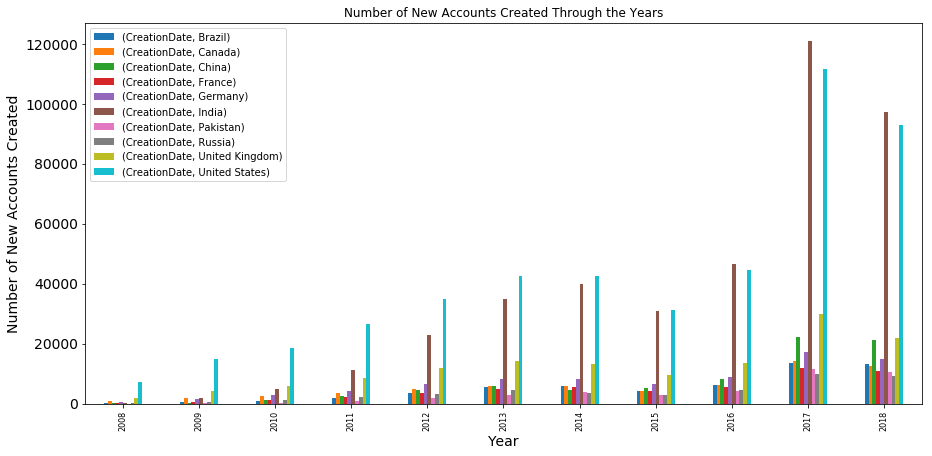

In [12]:
#bar plot
new.plot.bar().set(xlabel = 'Year', ylabel = 'Number of New Accounts Created', title='Number of New Accounts Created Through the Years')
plt.legend(title=False, fontsize =10)
plt.show()

In [13]:
#number of last accesses per year per country

new2 = df_HUC['LastAccessDate'].groupby([df_HUC.LastAccessDate.dt.year.rename('year'), df_HUC.Country.rename('Last Accesses')]).agg('count').reset_index()
new2 = new2.pivot('year', 'Last Accesses')

new2

LastAccessDate                                                \
Last Accesses         Brazil Canada  China France Germany   India Pakistan   
year                                                                         
2008                       6     17      1      5       8      13        1   
2009                      22     69     16     20      40     135       10   
2010                      50    248     86     84     183     700       36   
2011                     146    424    314    202     354    1660      132   
2012                     334    685    872    386     642    3969      304   
2013                     725   1172   2007    798    1185    7983      638   
2014                    1339   2126   2316   1483    2159   14158     1357   
2015                    1454   2520   2576   1798    2730   12986     1340   
2016                    2282   3137   3674   2259    3342   18370     1773   
2017                    9734  11977  16518   8889   12126   89109     8876   
2018                   39505  41032  47384  35014   56242  262151    24505   

                                                   
Last Accesses Russia United Kingdom United States  
year                                               
2008               2             46           231  
2009              10            188           744  
2010              77            528          1846  
2011             148            951          3407  
2012             302           1679          5177  
2013             706           3030          9601  
2014            1044           4966         16252  
2015            1219           5613         19463  
2016            1720           6913         24874  
2017            6513          24934         95125  
2018           30353          85836        290798

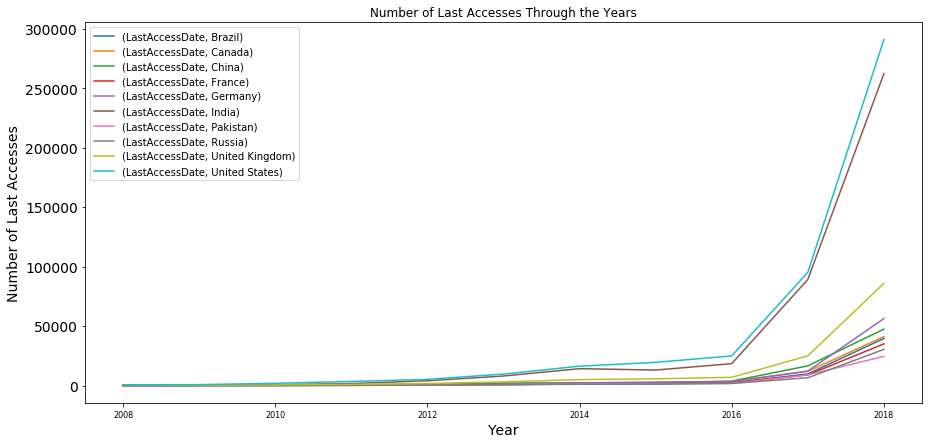

In [14]:
#line plot
new2.plot.line().set(xlabel = 'Year', ylabel = 'Number of Last Accesses', title='Number of Last Accesses Through the Years')
plt.legend(title=False, fontsize=10)
plt.show()


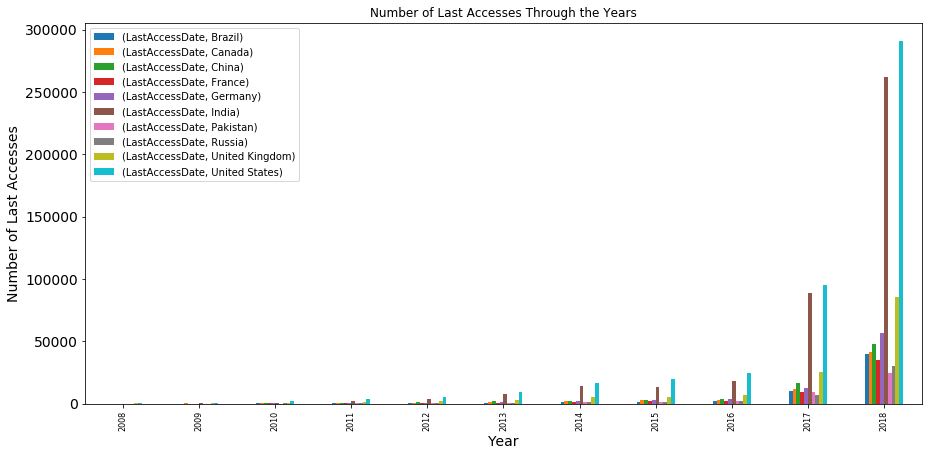

In [15]:
#bar plot
new2.plot.bar().set(xlabel = 'Year', ylabel = 'Number of Last Accesses', title='Number of Last Accesses Through the Years')
plt.legend(title=False, fontsize=10)
plt.show()

In [16]:
#dfRepMean has the average reputation for every country listed

dfRepMean = df.groupby('Country')['Reputation'].mean().reset_index()
dfRepMean = dfRepMean.compute()


,Country,Reputation
46,Curacao,33730.800000
163,San Marino,7290.538462
217,Holy See (vatican City State),1619.000000
5,Andorra,1057.327273
188,Trinidad And Tobago,962.517544
69,Gibraltar,811.187500
181,Switzerland,780.629282
122,Micronesia,718.700000
134,New Zealand,678.267147
193,Turks And Caicos Islands,634.800000


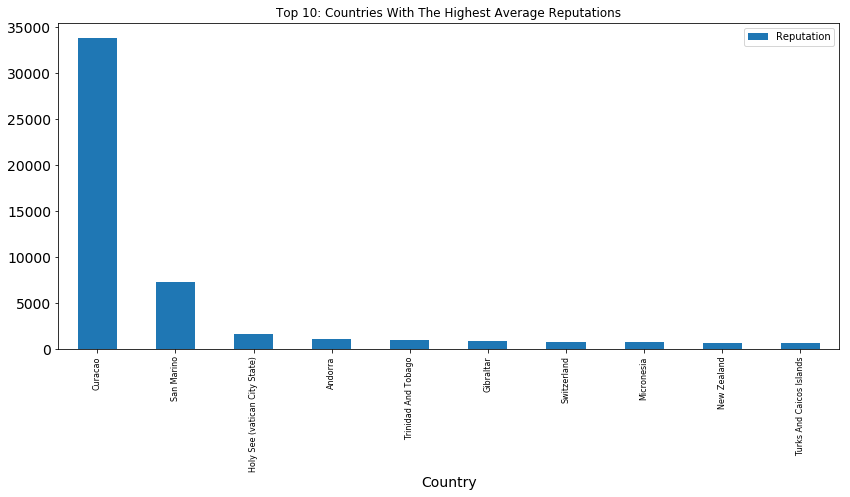

In [17]:
#dfRepMeanH has the countries with the 10 higher averages
plt.rcParams["figure.figsize"] = [14, 6]
dfRepMeanH = dfRepMean.nlargest(10, 'Reputation')
dfRepMeanH.plot.bar(x='Country', title = 'Top 10: Countries With The Highest Average Reputations')
dfRepMeanH